In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotated-Data\myLibraries")
from MARScore.score import MARSCore
from custom_score.utils import cleanString
from datasets_loaders.loaders import load_billsum
from sklearn.cluster import SpectralClustering

import matplotlib.pyplot as plt
import numpy as np

c:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotated-Data\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotated-Data\.venv\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotat


### Billsum experimentation

In [ ]:
dataset = load_billsum()
subset = dataset.iloc[:2, :]

In [ ]:
#ms = MARSCore(subset["text"].to_list(), subset["summary"].to_list(), clusterizer=SpectralClustering(affinity='nearest_neighbors'))
ms = MARSCore(subset["text"].to_list(), subset["summary"].to_list())
ms.compute()

In [ ]:
_=ms.assess()

In [ ]:
print(ms)

### Pubmed experimentation

In [2]:
dataset = pd.read_json(r'C:\Pro\Stages\A4 - DVRC\Work\Datasets\pubmed\test.json', lines=True)
dataset = dataset[["article_text", "abstract_text"]]
cleaner = lambda x: ". ".join(x).replace("<S>", "").strip()
format_dot = lambda x: x.replace(" .", ".")
dataset.loc[:,"abstract_text"] = dataset["abstract_text"].replace(regex=r"\[[^\]]*\]", value="")
dataset.loc[:,"article_text"] = dataset["article_text"].replace(regex=r"\[[^\]]*\]", value="")
dataset.loc[:,"abstract_text"] = dataset["abstract_text"].map(cleaner)
dataset.loc[:,"article_text"] = dataset["article_text"].map(cleaner)
dataset.loc[:,"abstract_text"] = dataset["abstract_text"].map(cleanString)
dataset.loc[:,"article_text"] = dataset["article_text"].map(cleanString)
dataset.loc[:,"abstract_text"] = dataset["abstract_text"].map(format_dot)
dataset.loc[:,"article_text"] = dataset["article_text"].map(format_dot)
dataset = dataset.rename(columns={"abstract_text": "summary",
                        "article_text": "text"})

In [3]:
subset = dataset.iloc[3:5, :]
subset

,text,summary
3,congenital adrenal hyperplasia ( cah ) refers ...,congenital adrenal hyperplasia is a group of a...
4,type 1 diabetes ( t1d ) results from the destr...,objective(s):pentoxifylline is an immunomodula...


In [4]:
ms = MARSCore(subset["text"].to_list(), subset["summary"].to_list())
ms.compute()

['[CLS]', 'congenital', 'ad', '##ren', '##al', 'hyper', '##pl', '##asia', '(', 'ca', '##h', ')', 'refers', 'to', 'a', 'group', 'of', 'auto', '##som', '##al', 'recess', '##ive', 'disorders', 'caused', 'by', 'an', 'enzyme', 'deficiency', 'which', 'leads', 'to', 'defects', 'in', 'bio', '##sy', '##nt', '##hesis', 'of', 'ste', '##roid', 'precursor', '##s', '.', 'depending', 'on', 'the', 'severity', 'and', 'degree', 'of', '21', 'hydro', '##xy', '##lase', 'deficiency', ',', 'the', 'clinical', 'spectrum', 'may', 'vary', 'from', 'mild', 'form', 'of', 'non', 'classical', 'ca', '##h', 'to', 'classic', 'ca', '##h', '.', 'however', ',', 'the', 'non', 'classical', 'ca', '##h', 'variant', 'is', 'more', 'common', 'with', 'a', 'prevalence', 'rate', 'of', '1', 'in', '1000', '.', 'it', 'also', 'helps', 'in', 'maintaining', 'normal', 'levels', 'of', 'precursor', '##s', 'by', 'suppress', '##ing', 'ad', '##ren', '##o', 'co', '##rti', '##co', 'tr', '##op', '##hic', 'hormone', '(', 'act', '##h', ')', '.', 'du

In [7]:
_=ms.assess()

Scores: 
   CBERT-R  CBERT-P  CBERT-F  BERTScore-R  BERTScore-P  BERTScore-F  BARTScore   R-1  R-2   R-L
0     0.68     0.64     0.66         0.84         0.86         0.85       0.32  0.39  0.2  0.31
1     0.83     0.72     0.77         0.85         0.82         0.83       0.38  0.33  0.1  0.13

Correlations: 
               pearson_CBERT_R-1  pearson_CBERT_R-2  pearson_CBERT_R-L  pearson_BERT_R-1  pearson_BERT_R-2  pearson_BERT_R-l  pearson_BART_R-1  pearson_BART_R-2  pearson_BART_R-l
Pearson score               -1.0               -1.0               -1.0               1.0               1.0               1.0              -1.0              -1.0              -1.0
p-value                      1.0                1.0                1.0               1.0               1.0               1.0               1.0               1.0               1.0


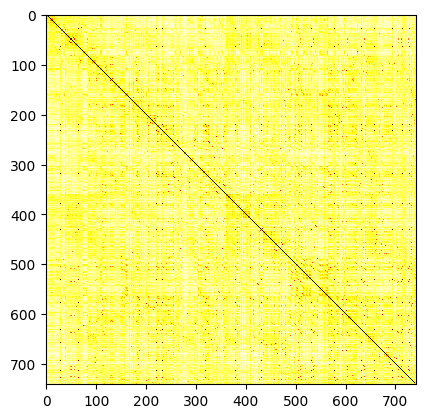

In [8]:
plt.imshow(ms.similarity_matrices[0], cmap='hot', interpolation='nearest')
plt.show()

In [9]:
print(ms)

--------MARScore OBJECT--------

Number of Documents : 2
Corpus Avg Size     : 11483
Refined Avg Size    : 1691

-------------------------------

Corpus no.1 : 85.0%
congenital adrenal hyperplasia ( cah ) refers to a group of autosomal recessive disorders caused by an enzyme deficiency which leads to defects in biosynthesis of steroid precursors.
depending on the severity and degree of 21 hydroxylase deficiency , the clinical spectrum may vary from mild form of non classical cah to classic cah.
however , the non classical cah variant is more common with a prevalence rate of 1 in 1000.
it also helps in maintaining normal levels of precursors by suppressing adreno cortico trophic hormone ( acth ).
during childhood.
, the management is largely focused on achieving normal growth and attaining appropriate final adult height.
johns medical college hospital , bangalore by the department of endocrinology on patients diagnosed to have cah and seen in the outpatient clinic between january 2012 a

### Spectral Clustering - Mincut

In [ ]:
from sklearn.cluster import SpectralClustering
from MARScore.utils import *
import hdbscan

In [ ]:
v = ms.vectors
l = ms.labels

In [ ]:
clusterer = SpectralClustering(affinity='nearest_neighbors')
v_clustered = clusterer.fit(v[0])


In [ ]:
v_clustered.labels_.astype(int)

In [ ]:
clusterer.__module__

In [ ]:
hdbscan.HDBSCAN().__module__

### Saving similarity Matrix

In [ ]:
import csv

def saveSimilarityMatrix(path, mat):
    with open(path, 'w', newline='') as f:
        write = csv.writer(f)
        write.writerows(mat)

In [ ]:
saveSimilarityMatrix(r"C:\Pro\Stages\A4 - DVRC\Work\Supervised-Learning-using-Unsupervised-Learning-Metrics-in-the-absence-of-Annotated-Data\myLibraries\MARScore_output\SimMat\simmat.csv", ms.similarity_matrices[0])